<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_Runtime_Sampler_Primitives_mkbahk_20241010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-ibm-runtime
%pip install qiskit-transpiler-service
%pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.3 MB/s eta 0:00:00


In [5]:
%pip show qiskit qiskit-ibm-runtime qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-transpiler-service
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 
---
Name: qiskit-aer
Version: 0.15.1

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import Estimator, Sampler, StatevectorSampler, PrimitiveJob

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator, Session, Options
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.visualization import plot_histogram

In [15]:
# Connecting runtime account
service = QiskitRuntimeService(channel="ibm_quantum", token="16d422f9c8fd7a34c34fa04292a3b27a4ebe822dd653724757d34fb7737a6e80f652b48092bb9dcfe2d295c3573298b01b8d95ea9693d33e106bb30591e77817")
#service.save_account(channel="ibm_quantum", token="YOUR_API_TOKEN")
#backends = service.least_busy(min_num_qubits=2)
#service.backends("ibm_brisbane")
backends=service.backends()
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [16]:
backend=backends[0]
print(backend)

<IBMBackend('ibm_brisbane')>


In [17]:
# Bell 상태 생성 회로 작성
qc = QuantumCircuit(2, 2)
qc.h(0)           # 큐빗 0에 Hadamard 게이트
qc.cx(0, 1)       # 큐빗 0에서 큐빗 1로 CNOT 게이트
qc.measure([0, 1], [0, 1])  # 두 큐빗을 측정

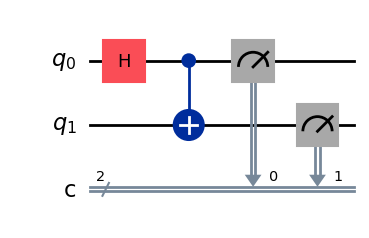

In [18]:
qc.draw('mpl')

In [25]:
# Estimator를 설정합니다
#sampler = Sampler(backend)

sampler = AerSampler()

pub = (qc)
job_sampler = sampler.run([pub], shots=10000)


### Don't change any code past this line ###

result_sampler = job_sampler.result()

# execute the quantum circuit
quasi_dists = result_sampler.quasi_dists[0]
print(quasi_dists)

{3: 0.5116, 0: 0.4884}


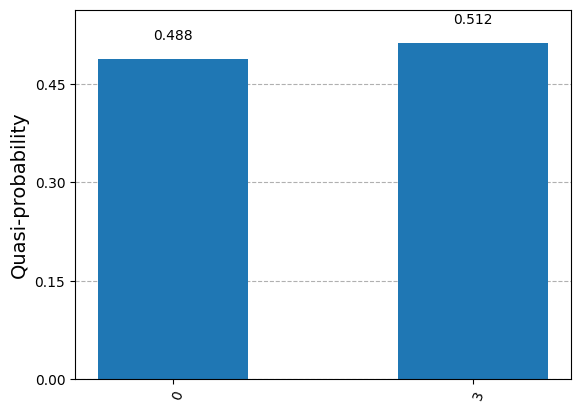

In [26]:
from qiskit.visualization import plot_histogram # Import plot_histogram
plot_histogram(quasi_dists)